/Users/furkan/miniconda3/envs/AI/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


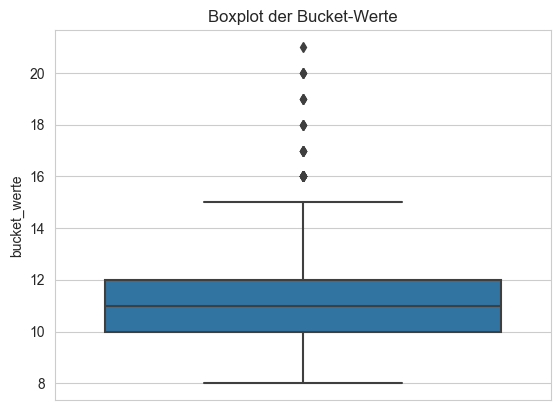

Geschätzte Anzahl: 1010682
Tatsächliche Anzahl: 1000000
Fehler in Prozent: 1.0682%


In [1]:
import hashlib
import random
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

class HyperLogLog:
    def __init__(self, bitanzahl=10):
        # Anzahl der Buckets (Speicherplätze) initialisieren
        self.anzahl_buckets = 2 ** bitanzahl
        self.buckets = [0] * self.anzahl_buckets
        self.bitanzahl = bitanzahl

    def _hash_wert_berechnen(self, wert):
        # Berechnet den Hash-Wert eines gegebenen Wertes
        return int(hashlib.sha256(wert.encode('utf-8')).hexdigest(), 16)

    def _bucket_bestimmen(self, hash_wert):
        # Bestimmt den zugehörigen Bucket für einen gegebenen Hash-Wert
        return hash_wert & (self.anzahl_buckets - 1)

    def _anzahl_fuehrende_nullen(self, hash_wert):
        # Zählt die Anzahl der führenden Nullen im Hash-Wert
        hash_wert >>= self.bitanzahl
        position_erstes_eins = 1
        while hash_wert & 1 == 0 and position_erstes_eins <= 64:
            position_erstes_eins += 1
            hash_wert >>= 1
        return position_erstes_eins

    def wert_hinzufuegen(self, wert):
        # Fügt einen neuen Wert zum HyperLogLog hinzu
        hash_wert = self._hash_wert_berechnen(wert)
        bucket = self._bucket_bestimmen(hash_wert)
        self.buckets[bucket] = max(self.buckets[bucket], self._anzahl_fuehrende_nullen(hash_wert))

    def geschaetzte_anzahl_berechnen(self):
        # Berechnet die geschätzte Anzahl einzigartiger Elemente
        summe = sum([2 ** -x for x in self.buckets])
        E = self.anzahl_buckets ** 2 / summe * 0.7213 / (1 + 1.079 / self.anzahl_buckets)
        return round(E)

# 1 Million zufällige Zeichenketten generieren
anzahl_zeichenketten = 1000000
zufaellige_zeichenketten = {''.join(random.choices(string.ascii_letters + string.digits, k=16)) for _ in range(anzahl_zeichenketten)}

# HyperLogLog initialisieren und Zeichenketten hinzufügen
hyperloglog = HyperLogLog()
for zeichenkette in zufaellige_zeichenketten:
    hyperloglog.wert_hinzufuegen(zeichenkette)

# Geschätzte Anzahl berechnen
geschaetzte_anzahl = hyperloglog.geschaetzte_anzahl_berechnen()

# Buckets für Seaborn-Visualisierung in DataFrame umwandeln
bucket_daten = pd.DataFrame(hyperloglog.buckets, columns=['bucket_werte'])

# Boxplot der Bucket-Werte mit Seaborn erstellen
sns.set_style("whitegrid")
sns.boxplot(data=bucket_daten, y='bucket_werte', orient='v')
plt.title('Boxplot der Bucket-Werte')
plt.show()

# Tatsächliche Anzahl berechnen
tatsaechliche_anzahl = len(zufaellige_zeichenketten)

# Fehler in Prozent berechnen
fehler_prozent = abs(geschaetzte_anzahl - tatsaechliche_anzahl) / tatsaechliche_anzahl * 100

# Ergebnisse ausgeben
print(f"Geschätzte Anzahl: {geschaetzte_anzahl}")
print(f"Tatsächliche Anzahl: {tatsaechliche_anzahl}")
print(f"Fehler in Prozent: {fehler_prozent}%")
